In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn import preprocessing

In [2]:
%matplotlib inline

In [3]:
data = pd.read_csv('./data/train_clear_.csv')
data_exam = pd.read_csv('./data/test_clear_.csv')

In [4]:
def set_dummies(ds):
    return pd.get_dummies(ds)

In [5]:
y = data.Price
data_exam_ids = data_exam.Id
data.drop(columns=['DistrictId', 'Id', 'Price'], axis=1, inplace=True)
data_exam.drop(columns=['DistrictId', 'Id'], axis=1, inplace=True)

In [6]:
X = data

In [7]:
X = set_dummies(data)
X_exam = set_dummies(data_exam)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### RandomForest

In [9]:
model = RandomForestRegressor(max_depth=20, random_state=42, n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

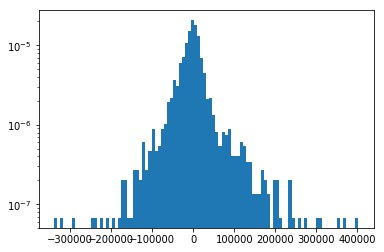

In [10]:
y_predict = model.predict(X_test)
compare_ds = pd.DataFrame({
    'y_test': y_test,
    'y_pred': y_predict.flatten()
}, columns=['y_test', 'y_pred'])
compare_ds['error'] = compare_ds.y_pred - compare_ds.y_test
plt_ = plt.hist(compare_ds.error, bins=100, density=True, log='y')

In [11]:
r2_forest = r2_score(compare_ds.y_test, compare_ds.y_pred)
r2_forest

0.7085853573229939

In [12]:
X_test.shape

(2000, 18)

In [13]:
X_exam.shape

(5000, 18)

In [14]:
y_predict_exam = model.predict(X_exam)

In [16]:
df_result = pd.DataFrame({'Id': data_exam_ids, 'Price': y_predict_exam})
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
Id       5000 non-null int64
Price    5000 non-null float64
dtypes: float64(1), int64(1)
memory usage: 78.2 KB


In [17]:
df_result.to_csv('./data/YZinovev_predictions.csv', index=None)